In [1]:
import pandas as pd

## Data Collection

In [2]:
dataset = pd.read_csv("healthcaredata_preprocessed.csv")

In [3]:
dataset

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830
1333,1334,18,female,31.920,0,no,northeast,2205.98080
1334,1335,18,female,36.850,0,no,southeast,1629.83350
1335,1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


## Data preprocessing

In [49]:
dataset.isna().sum()

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
bmi_category    0
dtype: int64

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1337 non-null   int64  
 1   sex           1337 non-null   object 
 2   bmi           1337 non-null   float64
 3   children      1337 non-null   int64  
 4   smoker        1337 non-null   object 
 5   region        1337 non-null   object 
 6   charges       1337 non-null   float64
 7   bmi_category  1337 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.7+ KB


In [51]:
dataset.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [55]:
def quanQual(dataset):
    quan = []
    qual = []

    for columnName in dataset.columns:
        if dataset[columnName].dtype =='O':
            qual.append(columnName)
        else:
            quan.append(columnName)
    return quan, qual

In [56]:
quan , qual =  quanQual(dataset)

In [57]:
quan

['age', 'bmi', 'children', 'charges']

In [58]:
qual

['sex', 'smoker', 'region', 'bmi_category']

In [59]:
# checking how many categories values are present Categorical data column
dataset['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [60]:
dataset['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [61]:
dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

## Univariate (EDA)

In [ ]:
import numpy as np

In [ ]:
descriptive = pd.DataFrame(columns = quan ,index=['Mean', 'Median', 'Mode', "Q1:25%", "Q2:50%", "Q3:75%", "99%","Q4:100%", "IQR", "1.5rule", "Lesser", "Greater", "min", "max"])
for columnName in quan:
    descriptive.loc["Mean", columnName] = dataset[columnName].mean()
    descriptive.loc["Median", columnName] = dataset[columnName].median()
    descriptive.loc["Mode", columnName] = dataset[columnName].mode()[0]
    descriptive.loc["Q1:25%", columnName] = dataset.describe()[columnName]["25%"]
    descriptive.loc["Q2:50%", columnName] = dataset.describe()[columnName]["50%"]
    descriptive.loc["Q3:75%", columnName] = dataset.describe()[columnName]["75%"]
    descriptive.loc["Q4:100%", columnName] = dataset.describe()[columnName]["max"]
    descriptive.loc["99%", columnName] = np.percentile(dataset[columnName],99)
    descriptive.loc["IQR", columnName] = descriptive[columnName]["Q3:75%"] - descriptive[columnName]["Q1:25%"]#descriptive.loc["Q3:75%", columnName] - descriptive.loc["Q1:25%", columnName]
    descriptive.loc["1.5rule", columnName] = 1.5 *  descriptive.loc["IQR", columnName]
    # 1.5 rule = 1.5 * IQR
    # lesser formula -->  Q1 - (1.5 * IQR)  ie. Q1 - 1.5rule
    descriptive.loc["Lesser", columnName] =  descriptive[columnName]["Q1:25%"] - descriptive.loc["1.5rule", columnName]  
    descriptive.loc["Greater", columnName] = descriptive[columnName]["Q3:75%"] + descriptive.loc["1.5rule", columnName]  # Q3 + 1.5 * IQR
    descriptive.loc["min", columnName] = dataset[columnName].min()
    descriptive.loc["max", columnName] = dataset[columnName].max()

In [ ]:
descriptive

## Handling Outliers

In [ ]:
lesser = []
greater = []
for colunName in quan:
    if descriptive[colunName]["min"] < descriptive[colunName]['Lesser']:
        lesser.append(colunName)
    if descriptive[colunName]["max"] > descriptive[colunName]['Greater']:
         greater.append(colunName)

In [ ]:
lesser

In [ ]:
greater

In [ ]:
for columnName in lesser:
    dataset.loc[dataset[columnName]<descriptive[columnName]["Lesser"], columnName]= descriptive[columnName]["Lesser"]
    print(dataset[columnName])
    print(dataset[columnName]<descriptive[columnName]["Lesser"])
for columnName in greater:
    dataset.loc[dataset[columnName]>descriptive[columnName]["Greater"], columnName]= descriptive[columnName]["Greater"]

In [ ]:
#Checking outliers

lesser = []
greater = []
for colunName in quan:
    if descriptive[colunName]["min"] < descriptive[colunName]['Lesser']:
        lesser.append(colunName)
    if descriptive[colunName]["max"] > descriptive[colunName]['Greater']:
         greater.append(colunName)

print('Lesser outlier', lesser)
print('Greater Outlier', greater)

## Skewness and Kurtosis, variance, standard deviation

In [ ]:
for columnName in quan:
    descriptive.loc["skew", columnName] = dataset[columnName].skew()
    descriptive.loc["kurtosis", columnName] = dataset[columnName].kurtosis()
    descriptive.loc['Variance',columnName] = dataset[columnName].var()
    descriptive.loc['Standard Deviation',columnName] = dataset[columnName].std()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

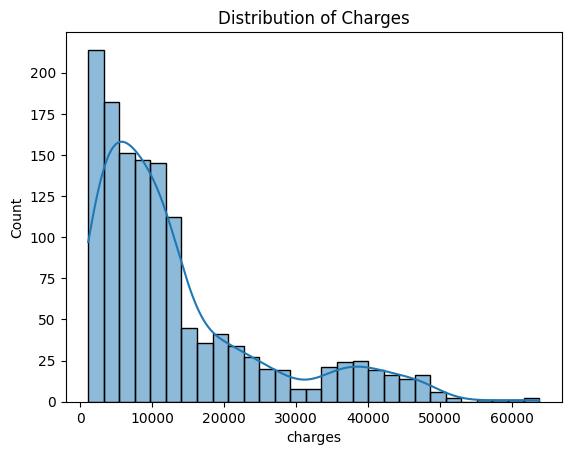

In [9]:
#Distribution of Charges
import seaborn as sns
sns.histplot(dataset['charges'], kde=True)
plt.title("Distribution of Charges")
plt.show()

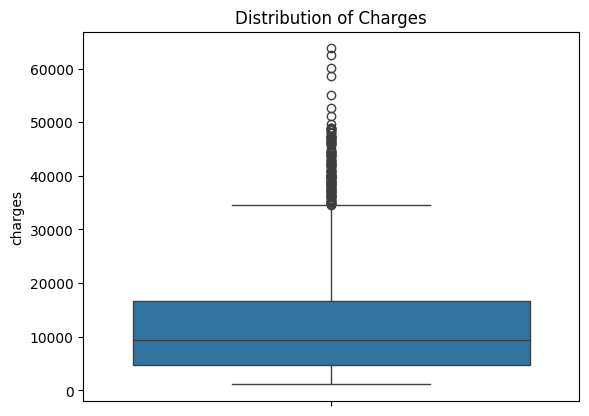

In [15]:
#Distribution of Charges
import seaborn as sns
sns.boxplot(y=dataset['charges'])
plt.title("Distribution of Charges")
plt.show()

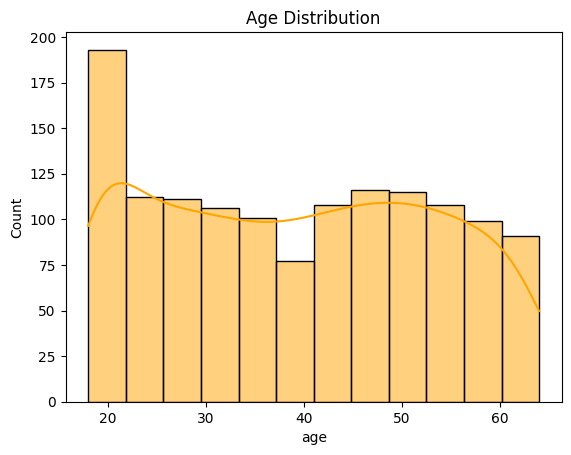

In [18]:
#Age Distribution
sns.histplot(dataset['age'], kde=True, color='orange')
plt.title("Age Distribution")
plt.show()

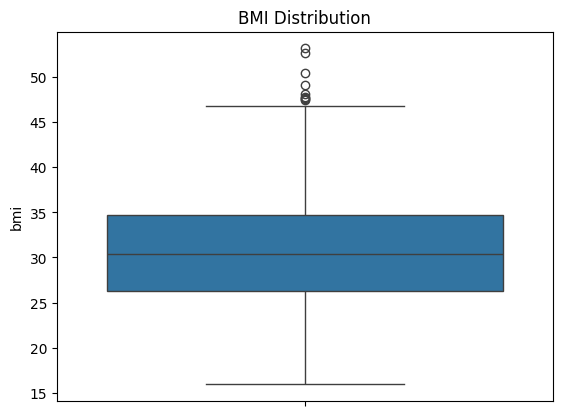

In [21]:
#BMI Distribution
sns.boxplot(dataset['bmi'])
plt.title("BMI Distribution")
plt.show()

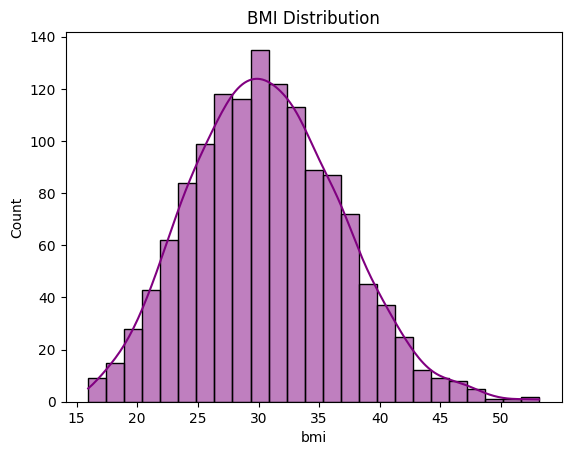

In [23]:
#BMI Distribution
sns.histplot(dataset['bmi'], kde=True, color='purple')
plt.title("BMI Distribution")
plt.show()

In [24]:

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'
dataset['bmi_category'] = dataset['bmi'].apply(categorize_bmi)



In [26]:
#method 2
bmidf = pd.DataFrame(index=['Underweight','Normal', 'Overweight', 'Obese'], columns=['bmicount'])
u = 0
n = 0
over=0
ob = 0
# def categorize_bmi(bmi):
for bmi in dataset['bmi']:
    if bmi < 18.5:
        u=u+1
    elif 18.5 <= bmi < 25:
        n=n+1
    elif 25 <= bmi < 30:
        over=over+1
    else:
        ob=ob+1
     # u,n,over,ob
# print(u,n,over,ob)
bmidf.loc['Underweight','bmicount']=u
bmidf.loc['Normal','bmicount']= n
bmidf.loc['Overweight','bmicount']=over
bmidf.loc['Obese','bmicount']=ob
bmidf

,bmicount
Underweight,20
Normal,225
Overweight,386
Obese,706


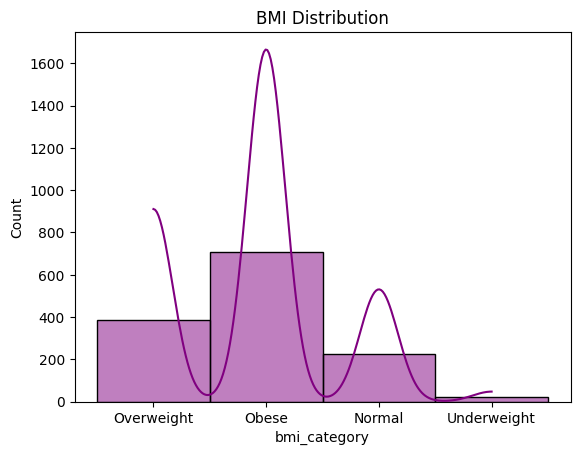

In [25]:
#BMI Distribution
sns.histplot(dataset['bmi_category'], kde=True, color='purple')
plt.title("BMI Distribution")
plt.show()

<Axes: ylabel='smoker'>

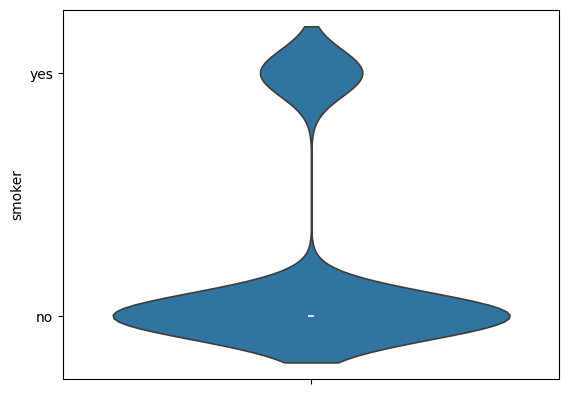

In [29]:
#Smoker vs Non-Smoker Charges
sns.violinplot(dataset['smoker'])

## Bivariate Analysis

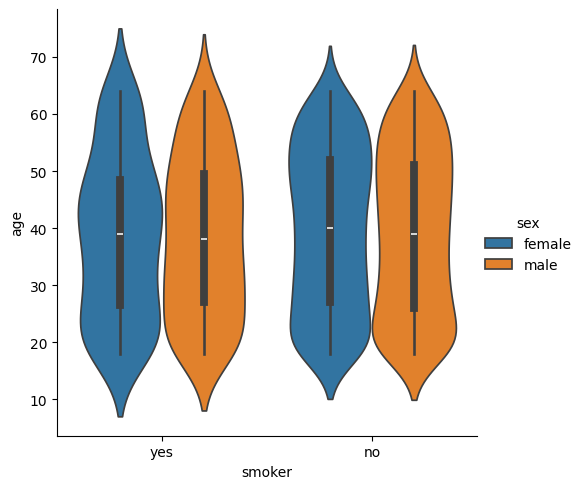

In [47]:
sns.catplot(data=dataset, x="smoker", y="age", hue="sex", kind="violin")

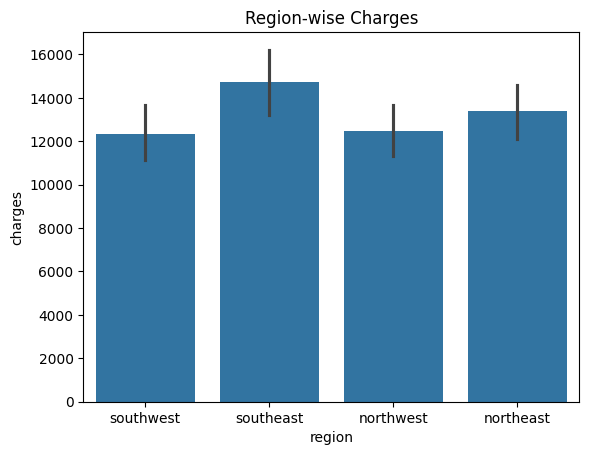

In [36]:
# Region-wise Charge
sns.barplot(data=dataset, x="region", y="charges")
plt.title("Region-wise Charges")
plt.show()

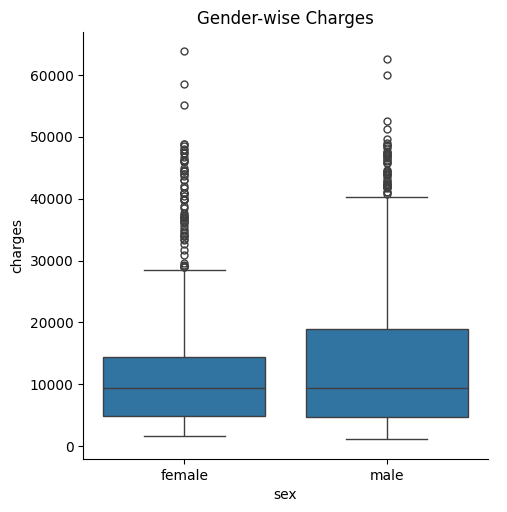

In [34]:
#Gender vs Charges
sns.catplot(data=dataset, x='sex', y='charges', kind='box')
plt.title("Gender-wise Charges")
plt.show()

<Axes: xlabel='age', ylabel='charges'>

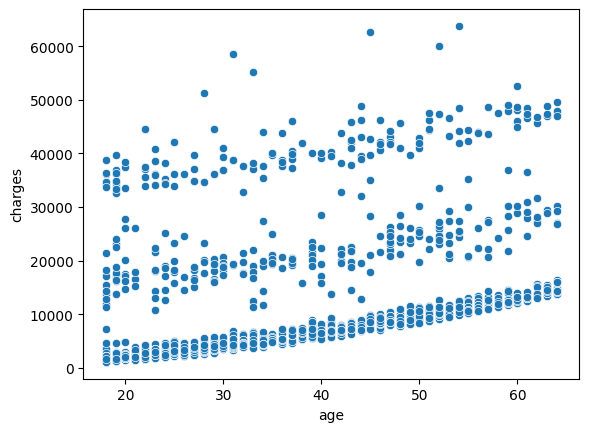

In [40]:
#Age vs Charges
sns.scatterplot(data=dataset, x='age', y='charges')

<Axes: xlabel='bmi_category', ylabel='charges'>

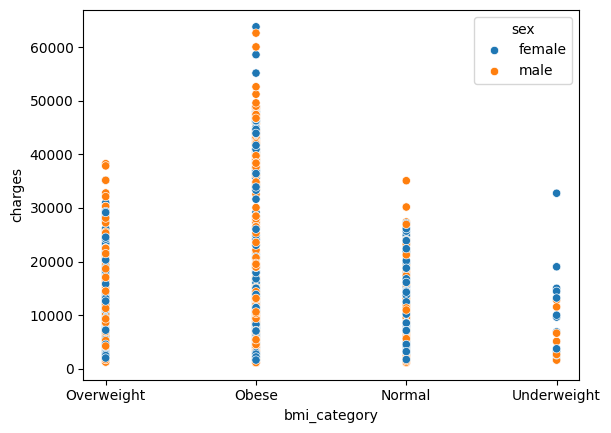

In [43]:
# BMI vs Charges

sns.scatterplot(data=dataset, x='bmi_category', y='charges', hue='sex')

In [62]:
dataset[quan].corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


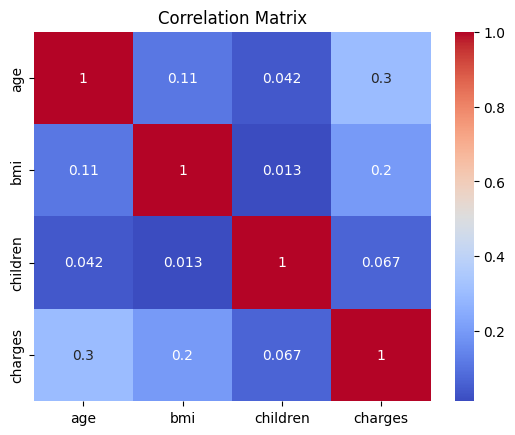

In [63]:
# Correlation Heatmap
sns.heatmap(dataset[quan].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Hypothesis testing

In [73]:
# T-test: Charges between smokers and non-smokers
from scipy.stats import ttest_ind
dataset= dataset.dropna()
smoker_charges = dataset[dataset['smoker']=='yes']['charges']
non_smoker_charges = dataset[dataset['smoker']=='no']['charges']
t_stat, p_val = ttest_ind(smoker_charges, non_smoker_charges)
print("T-test for smokers vs non-smokers:")
print("t-statistic =", t_stat, "\np-value =", p_val)

# Hypothesis Testing Decision
if p_val < 0.05:
    print("Reject Null Hypothesis: There is a significant difference in charges between smokers.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in charges between smokers.")

T-test for smokers vs non-smokers:
t-statistic = 46.64479459840305 
p-value = 1.4067220949376498e-282
Reject Null Hypothesis: There is a significant difference in charges between smokers.


In [ ]:
Anova test

In [80]:
from scipy import stats

# Get the values for etest_p and mba_p
region_values = dataset['age']
charges_values = dataset['charges']

# Perform One-way ANOVA
f_stat, p_value = stats.f_oneway(region_values, charges_values)
print(p_value)
# Hypothesis Testing Decision
if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference between age and charges.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference between age and charges.")

2.50511436180246e-274
Reject Null Hypothesis: There is a significant difference between age and charges.


In [82]:
df=dataset
# ANOVA: Charges across regions
anova = stats.f_oneway(*(df[df['region']==r]['charges'] for r in df['region'].unique()))
print("\nANOVA test for regions:")
print("F-statistic =", anova.statistic, ", p-value =", anova.pvalue)
# Hypothesis Testing Decision
if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference between region and charges.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference between region and charges.")


ANOVA test for regions:
F-statistic = 2.926139903662776 , p-value = 0.03276288025444947
Reject Null Hypothesis: There is a significant difference between region and charges.
